#### Data Analysis

In [2]:
import numpy as np
import pandas as pd

In [5]:
Data = pd.read_csv('human-resources-analytics/HR_comma_sep.csv')

In [4]:
Data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
columns = Data.columns.tolist()

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

In [10]:
categorical=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','sales','salary']

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

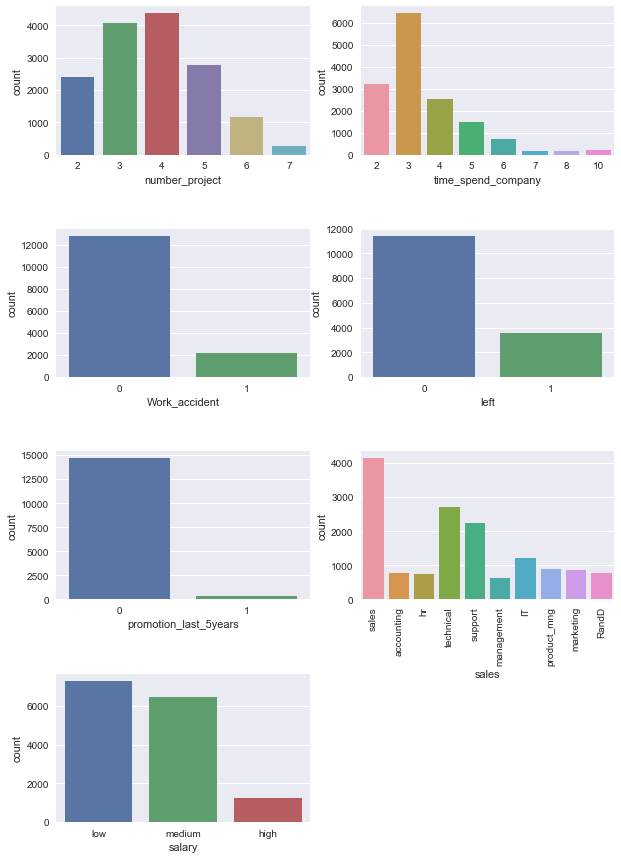

In [23]:
fig=plt.subplots(figsize=(10,15))
length=len(categorical)
for i,j in itertools.zip_longest(categorical,range(length)):
    #j+1 - gives the plot number
    plt.subplot(np.ceil(length/2),2,j+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x=i, data= Data)
    
plt.subplot(np.ceil(length/2),2,6)
plt.xticks(rotation=90)

In [27]:
len(Data[Data['left']==1])

3571

In [29]:
3571/14999

0.2380825388359224

#### Let's analyze the categorical & ordinal variable

In [17]:
# here we will do it only for categorical variable
categorical=['number_project','time_spend_company','Work_accident','promotion_last_5years','sales','salary']

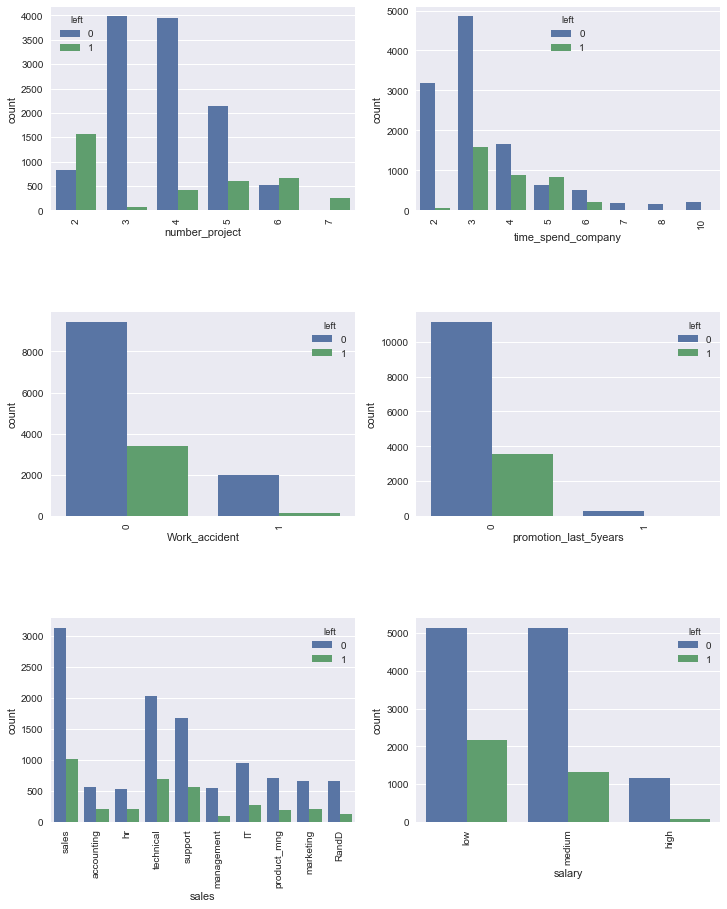

In [18]:
fig=plt.subplots(figsize=(12,15))
length = len(categorical)
for i,j in itertools.zip_longest(categorical,range(length)):
    plt.subplot(np.ceil(length/2),2,j+1)
    plt.subplots_adjust(hspace=.5)
    sns.countplot(x=i,data = Data,hue="left")
    plt.xticks(rotation=90)
    
    

### Observations
* Those who were promoted in last 5 years didn't leave the company
* Those who have spent 5 years in company are more in proportion compared to people staying back
* More than 6 years, people dont leave company anymore
* People who have done more than 7 projects have left the company.
* more than 6 years expr are not leaving company & more than 7 years are not staying back. So, folks who have done many projects faster are leaving company

#### Lets Calculate proportions for the above

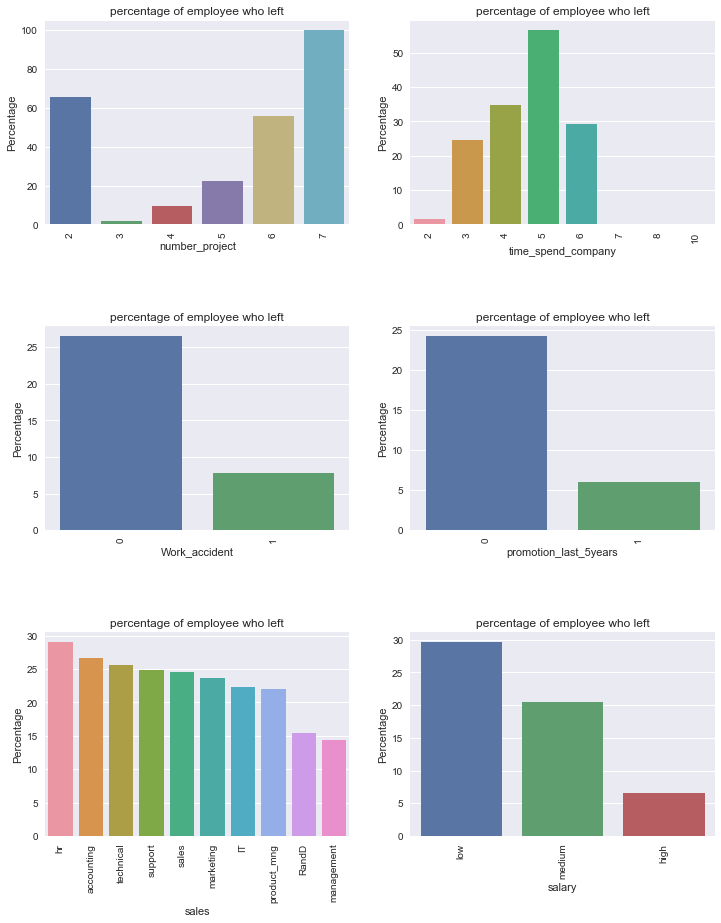

In [30]:
#categorical=['number_project']
#length = len(categorical)


# here we will do it only for categorical variable
categorical=['number_project','time_spend_company','Work_accident','promotion_last_5years','sales','salary']
length = len(categorical)


fig=plt.subplots(figsize=(12,15))
for i,j in itertools.zip_longest(categorical,range(length)):
    # only counting the number who left 
    Proportion_of_data = Data.groupby([i])['left'].agg(lambda x: (x==1).sum()).reset_index()
    
    # Counting the total number 
    Proportion_of_data1=Data.groupby([i])['left'].count().reset_index() 
    
    # mergeing two data frames
    Proportion_of_data2 = pd.merge(Proportion_of_data,Proportion_of_data1,on=i) 
    
    # Now we will calculate the % of employee who left category wise
    Proportion_of_data2["Proportion"]=(Proportion_of_data2['left_x']/Proportion_of_data2['left_y'])*100 
    Proportion_of_data2=Proportion_of_data2.sort_values(by="Proportion",ascending=False).reset_index(drop=True)#sorting by percentage
    plt.subplot(np.ceil(length/2),2,j+1)
    plt.subplots_adjust(hspace=.5)
    sns.barplot(x=i,y='Proportion',data=Proportion_of_data2)
    plt.xticks(rotation=90)
    plt.title("percentage of employee who left")
    plt.ylabel('Percentage')

In [27]:
Proportion_of_data2

,number_project,left_x,left_y,Proportion
0,7,256,256,100.000000
1,2,1567,2388,65.619765
2,6,655,1174,55.792164
3,5,612,2761,22.165882
4,4,409,4365,9.369989
5,3,72,4055,1.775586


In [25]:
Proportion_of_data1

,number_project,left
0,2,2388
1,3,4055
2,4,4365
3,5,2761
4,6,1174
5,7,256


In [26]:
Proportion_of_data

,number_project,left
0,2,1567
1,3,72
2,4,409
3,5,612
4,6,655
5,7,256


### Feature Engineering
* Find imp features for prediction
* Use Randomforest to find imp features

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5]),
 <a list of 8 Text xticklabel objects>)

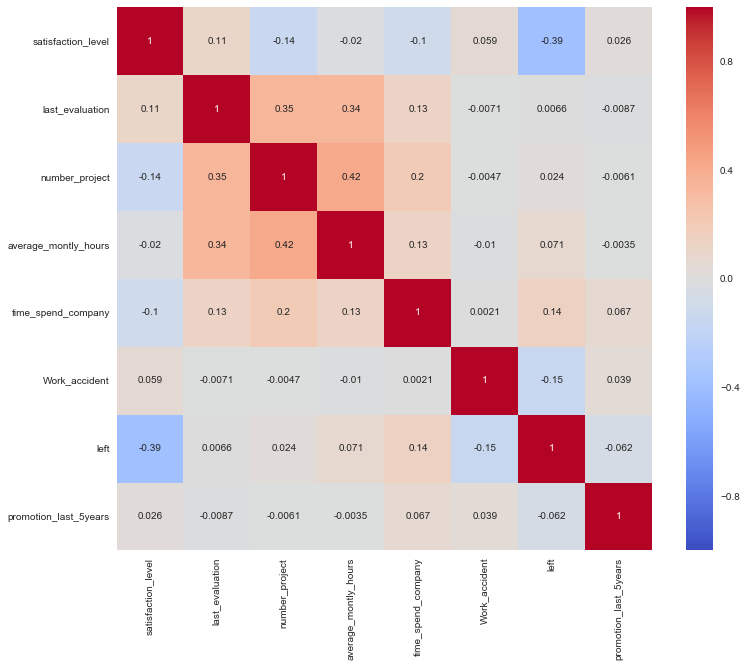

In [32]:
# Let's plot the correlation Matrix
#Data.drop('Impact',axis=1,inplace=True)
corr= Data.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,cbar=True,cmap="coolwarm")
plt.xticks(rotation=90)

In [33]:
# For changing categorical variable into int
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import accuracy_score 
le=LabelEncoder()
Data['salary']=le.fit_transform(Data['salary'])
Data['sales']=le.fit_transform(Data['sales'])

In [34]:
Data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [35]:
# we can select importance features by using Randomforest Classifier
from sklearn.ensemble import RandomForestClassifier 
model= RandomForestClassifier(n_estimators=100)

#Using all features except for left
feature_var = Data.ix[:,Data.columns != "left"]

#Target feature
pred_var = Data.ix[:,Data.columns=='left']

#Training
model.fit(feature_var,pred_var.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [36]:
featimp = pd.Series(model.feature_importances_,index=feature_var.columns).sort_values(ascending=False)
print(featimp)

satisfaction_level       0.359148
number_project           0.181580
time_spend_company       0.175395
average_montly_hours     0.131213
last_evaluation          0.126108
sales                    0.011972
salary                   0.008104
Work_accident            0.005376
promotion_last_5years    0.001103
dtype: float64


###  Machine Learning Models


In [37]:
# Importing Machine learning models library used for classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.naive_bayes import GaussianNB as GB
from sklearn.svm import SVC

C:\Users\ZekeLabs\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [38]:
def Classification_model(model,Data,x,y): # here x is the variable which are used for prediction
    # y is the prediction variable
    train,test = train_test_split(Data,test_size= 0.33)
    train_x = Data.ix[train.index,x] # Data for training only with features
    train_y = Data.ix[train.index,y] # Data for training only with predcition variable
    test_x = Data.ix[test.index,x] # same as for training 
    test_y = Data.ix[test.index,y]
    
    model.fit(train_x,train_y.values.ravel())
    
    pred=model.predict(test_x)
    
    accuracy=accuracy_score(test_y,pred)
    return accuracy

In [39]:
All_features=['satisfaction_level',
'number_project',
'time_spend_company',
'average_montly_hours',
'last_evaluation',
'sales',
'salary',
'Work_accident',       
'promotion_last_5years']

In [42]:
Important_features = ['satisfaction_level',
'number_project',
'time_spend_company',
'average_montly_hours',
'last_evaluation']

#Target Variable
Pred_var = ["left"]

In [43]:
models=["RandomForestClassifier","Gaussian Naive Bays","KNN","Logistic_Regression","Support_Vector"]
Classification_models = [RandomForestClassifier(n_estimators=100),GB(),knn(n_neighbors=7),LogisticRegression(),SVC()]
Model_Accuracy = []
for model in Classification_models:
    Accuracy=Classification_model(model,Data,All_features,Pred_var)
    Model_Accuracy.append(Accuracy)

In [44]:
Model_Accuracy

[0.99111111111111116,
 0.79878787878787882,
 0.93414141414141416,
 0.75979797979797981,
 0.94828282828282828]

In [45]:
models=["RandomForestClassifier","Gaussian Naive Bays","KNN","Logistic_Regression","Support_Vector"]
Classification_models = [RandomForestClassifier(n_estimators=100),GB(),knn(n_neighbors=7),LogisticRegression(),SVC()]
Model_Accuracy = []
for model in Classification_models:
    Accuracy=Classification_model(model,Data,Important_features,Pred_var)
    Model_Accuracy.append(Accuracy)

In [46]:
Model_Accuracy

[0.98888888888888893,
 0.80949494949494949,
 0.94747474747474747,
 0.76161616161616164,
 0.95353535353535357]

In [47]:
#### Cross Validation